# Homework2: Variational inference and VAE

Ульяна Быкова

- в этой версии добавлено выполнение задания 3 "VAE on CIFAR10 data"

## Task 1: Theory (5pt)

### Problem 1: Log-derivative trick (1pt)

In Lecture 3 we encountered a problem with Monte Carlo estimation during deriving the ELBO gradient at the E-step of EM-algorithm. Our density function $q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi})$ depends on the gradient parameters $\boldsymbol{\phi}$.
\begin{align*}
    \nabla_{\boldsymbol{\phi}} \mathcal{L} (\boldsymbol{\phi}, \boldsymbol{\theta}) &= \nabla_{\boldsymbol{\phi}} \int q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) \left[\log p(\mathbf{x}, \mathbf{z} | \boldsymbol{\theta}) - \log q(\mathbf{z}| \mathbf{x}, \boldsymbol{\phi}) \right] d \mathbf{z} \\
    & \neq  \int q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) \nabla_{\boldsymbol{\phi}} \left[\log p(\mathbf{x}, \mathbf{z} | \boldsymbol{\theta}) - \log q(\mathbf{z}| \mathbf{x}, \boldsymbol{\phi}) \right] d \mathbf{z} \\
\end{align*}
The Reparametrization trick allowed us to pass the gradient inside the integral and get a Monte Carlo estimate. 

However, there is another way to achive this. It is called **log-derivative trick**:
$$
    \nabla_\xi  \log q(\eta| \xi) = \frac{\nabla_\xi q(\eta| \xi)}{q(\eta| \xi)}.
$$

1. Get the Monte Carlo estimate of the gradient using the formula for the derivative of the logarithm.

2. The final expression often works significantly worse than the reparametrization trick. Namely, it has a huge variance. Try to describe the intuition why the evaluation has a high variance (you need to think about what order and sign the terms in the expression will have).

\begin{align*}
    \nabla_{\boldsymbol{\phi}} \mathcal{L} (\boldsymbol{\phi}, \boldsymbol{\theta}) &= \nabla_{\boldsymbol{\phi}} \int q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) \left[\log p(\mathbf{x}, \mathbf{z} | \boldsymbol{\theta}) - \log q(\mathbf{z}| \mathbf{x}, \boldsymbol{\phi}) \right] d \mathbf{z} = \\
    &= \nabla_{\boldsymbol{\phi}} \int q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) \left[\log p(\mathbf{x}| \mathbf{z}, \boldsymbol{\theta}) + \log p(\mathbf{z}) - \log q(\mathbf{z}| \mathbf{x}, \boldsymbol{\phi}) \right] d \mathbf{z} = \\
    &= \nabla_{\boldsymbol{\phi}} \int q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) \left[\log p(\mathbf{x}| \mathbf{z}, \boldsymbol{\theta}) - \log \frac{q(\mathbf{z}| \mathbf{x}, \boldsymbol{\phi})}{p(\mathbf{z})} \right] d \mathbf{z} = \\
    &= \nabla_{\boldsymbol{\phi}} \int q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) \log p(\mathbf{x}| \mathbf{z}, \boldsymbol{\theta}) - \nabla_{\boldsymbol{\phi}} \int q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi})\log \frac{q(\mathbf{z}| \mathbf{x}, \boldsymbol{\phi})}{p(\mathbf{z})} d \mathbf{z} = \\
    &= \nabla_{\boldsymbol{\phi}} \int q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) \log p(\mathbf{x}| \mathbf{z}, \boldsymbol{\theta}) - \nabla_{\boldsymbol{\phi}} \mathsf{KL} (q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi})||p(\mathbf{z})) = \\
    &= \int  \log p(\mathbf{x}| \mathbf{z}, \boldsymbol{\theta})\nabla_{\boldsymbol{\phi}}q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) d \mathbf{z} - \nabla_{\boldsymbol{\phi}} \mathsf{KL} (q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi})||p(\mathbf{z})) = \\
    &= \int \log p(\mathbf{x}| \mathbf{z}, \boldsymbol{\theta}) q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi})\nabla_{\boldsymbol{\phi}} \log q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) d \mathbf{z} - \nabla_{\boldsymbol{\phi}} \mathsf{KL} (q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi})||p(\mathbf{z})) = \\
    &= \int \log p(\mathbf{x}| \mathbf{z}, \boldsymbol{\theta}) q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi})\nabla_{\boldsymbol{\phi}} \log q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) d \mathbf{z} - \nabla_{\boldsymbol{\phi}} \mathsf{KL} (q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi})||p(\mathbf{z})) = \\
    &= \mathbb{E}_{q(\mathbf{z}| \mathbf{x}, \boldsymbol{\phi})}\log p(\mathbf{x}| \mathbf{z}, \boldsymbol{\theta})\nabla_{\boldsymbol{\phi}} \log q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) - \nabla_{\boldsymbol{\phi}} \mathsf{KL} (q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi})||p(\mathbf{z}))\approx \\
    &≈ \frac{1}{K} \sum_{i=1}^{K}\log p(\mathbf{x}| \mathbf{z}, \boldsymbol{\theta})\nabla_{\boldsymbol{\phi}} \log q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) - \nabla_{\boldsymbol{\phi}} \mathsf{KL} (q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi})||p(\mathbf{z}))
\end{align*}

В сравнении с выражением, полученным с применением reparametrization trick, добавляется умножение на логарифм плотности вероятности. Так как плотность вероятности может принимать значения от 0 до $+\inf$ (для дельта-функции), соответственно ее логарифм может принимать значения от $-\inf$ до $+\inf$. Получаем сильный разброс значений.

### Problem 2: IWAE theory (1pt)

In Lecture 4 we discussed [IWAE](https://arxiv.org/abs/1509.00519) model. This model introduces the improved version of the variational lower bound (ELBO):

$$
    \mathcal{L}_K (q, \boldsymbol{\theta})  = \mathbb{E}_{\mathbf{z}_1, \dots, \mathbf{z}_K \sim q(\mathbf{z} | \mathbf{x})} \log \left( \frac{1}{K}\sum_{k=1}^K\frac{p(\mathbf{x}, \mathbf{z}_k | \boldsymbol{\theta})}{q(\mathbf{z}_k| \mathbf{x})} \right) \rightarrow \max_{q, \boldsymbol{\theta}}.
$$

Here we had the theorem without proof:

1. $\log p(\mathbf{x} | \boldsymbol{\theta}) \geq \mathcal{L}_K (q, \boldsymbol{\theta}) \geq \mathcal{L}_M (q, \boldsymbol{\theta}), \quad \text{for } K \geq M$;
2.  $\log p(\mathbf{x} | \boldsymbol{\theta}) = \lim_{K \rightarrow \infty} \mathcal{L}_K (q, \boldsymbol{\theta})$ if $\frac{p(\mathbf{x}, \mathbf{z} | \boldsymbol{\theta})}{q(\mathbf{z} | \mathbf{x})}$ is bounded.

Now it is time to prove it :)

**Hints:**
1. First part of the theorem.

    (a) Use the following equation inside the logarithm of $ \mathcal{L}_K (q, \boldsymbol{\theta}) $
$$
    \frac{a_1 + \dots + a_K}{K} = \mathbb{E}_{k_1, \dots, k_M} \frac{a_{k_1} + \dots + a_{k_M}}{M}, \quad k_1, \dots, k_M \sim U[1, K]
$$
    (b) Apply Jensen' inequality.
3. Second part of the theorem: use the Law of large numbers.


1. Докажем 1 часть неравенства $\log p(\mathbf{x} | \boldsymbol{\theta}) \geq \mathcal{L}_K (q, \boldsymbol{\theta}) $, воспользовавшись неравенством Йенсена и тем, что логарифм является вогнутой функцией


$$\mathcal{L}_K (q, \boldsymbol{\theta}) = \mathbb{E}_{} \left[\log \frac{1}{K}\sum_{k=1}^K\frac{p(\mathbf{x}, \mathbf{z}_k | \boldsymbol{\theta})}{q(\mathbf{z}_k| \mathbf{x})} \right] \le \log\mathbb{E}_{} \left[ \frac{1}{K}\sum_{k=1}^K\frac{p(\mathbf{x}, \mathbf{z}_k | \boldsymbol{\theta})}{q(\mathbf{z}_k| \mathbf{x})} \right] = \log p(\mathbf{x} | \boldsymbol{\theta})$$

ЧТД

Докажем вторую часть неравенства $\mathcal{L}_K (q, \boldsymbol{\theta}) \geq \mathcal{L}_M (q, \boldsymbol{\theta}),~ \text{for } K \geq M$, воспользовавшись подсказкой из 1.(а) и снова неравенством Йенсена для логарифма

\begin{align*}
&\mathcal{L}_K (q, \boldsymbol{\theta}) = \mathbb{E}_{\mathbf{z}_1, \dots, \mathbf{z}_K} \left[\log \frac{1}{K}\sum_{k=1}^K\frac{p(\mathbf{x}, \mathbf{z}_k | \boldsymbol{\theta})}{q(\mathbf{z}_k| \mathbf{x})} \right] =\\
&= \mathbb{E}_{\mathbf{z}_1, \dots, \mathbf{z}_K} \left[\log  \mathbb{E}_{k_1, \dots, k_M}\left[\frac{1}{M}\sum_{i=1}^M\frac{p(\mathbf{x}, \mathbf{z}_{k_i} | \boldsymbol{\theta})}{q(\mathbf{z}_{k_i}| \mathbf{x})} \right]\right] \ge \mathbb{E}_{\mathbf{z}_1, \dots, \mathbf{z}_K} \left[  \mathbb{E}_{k_1, \dots, k_M}\left[\log\frac{1}{M}\sum_{i=1}^M\frac{p(\mathbf{x}, \mathbf{z}_{k_i} | \boldsymbol{\theta})}{q(\mathbf{z}_{k_i}| \mathbf{x})} \right]\right] =\\
&= \mathbb{E}_{\mathbf{z}_1, \dots, \mathbf{z}_M} \left[ \log\frac{1}{M}\sum_{k=1}^M\frac{p(\mathbf{x}, \mathbf{z}_{k} | \boldsymbol{\theta})}{q(\mathbf{z}_{k}| \mathbf{x})} \right] = \mathcal{L}_M (q, \boldsymbol{\theta})
\end{align*}

ЧТД

Если if $\frac{p(\mathbf{x}, \mathbf{z} | \boldsymbol{\theta})}{q(\mathbf{z} | \mathbf{x})}$ ограничено, то из ЗБЧ следует, что $\frac{1}{K}\sum_{k=1}^K\frac{p(\mathbf{x}, \mathbf{z}_k | \boldsymbol{\theta})}{q(\mathbf{z}_k| \mathbf{x})}$ стремится к $\mathbb{E}_{q(\mathbf{z}_k| \mathbf{x})} \left[ \frac{p(\mathbf{x}, \mathbf{z}_k | \boldsymbol{\theta})}{q(\mathbf{z}_k| \mathbf{x})} \right] = p(\mathbf{x} | \boldsymbol{\theta})$ почти наверняка. Следовательно, $ \mathcal{L}_K (q, \boldsymbol{\theta})$ стремится к $\log p(\mathbf{x} | \boldsymbol{\theta})$ при $K \rightarrow \infty$. ЧТД

In [1]:
REPO_NAME = "2022-DGM-Ozon-course"
!if [ -d {REPO_NAME} ]; then rm -Rf {REPO_NAME}; fi
!git clone https://github.com/r-isachenko/{REPO_NAME}.git
!cd {REPO_NAME}
!pip install ./{REPO_NAME}/homeworks/
!rm -Rf {REPO_NAME}

Cloning into '2022-DGM-Ozon-course'...
remote: Enumerating objects: 1461, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 1461 (delta 32), reused 64 (delta 28), pack-reused 1393
Receiving objects: 100% (1461/1461), 417.48 MiB | 16.52 MiB/s, done.
Resolving deltas: 100% (730/730), done.
Checking out files: 100% (277/277), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./2022-DGM-Ozon-course/homeworks
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for dgm-utils: filename=dgm_utils-0.1.0-py3-none-

In [2]:
from dgm_utils import train_model, plot_training_curves
from dgm_utils import visualize_2d_data, visualize_2d_samples
from dgm_utils import show_samples, visualize_images, load_pickle

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data

USE_CUDA = torch.cuda.is_available()

In [4]:
USE_CUDA

True

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Task 2: VAE on 2d data (4pt) 
In this task we will implement simple VAE model for 2d gaussian distribution $\mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma})$.

We will consider two cases: 
* 2d univariate distribution (diagonal covariance matrix $\boldsymbol{\Sigma}$);
* 2d multivariate distribution (strictly non-diagonal covariance matrix $\boldsymbol{\Sigma}$).

The goal is to analyze the difference between these two cases and understand why the trained VAE models will behave differently.

Below you will find data generation function. Look carefully, do not change.

In [6]:
def generate_2d_data(count, mode='univariate'):
    assert mode in ['univariate', 'multivariate']
    np.random.seed(1242)
    mean = [[2.0, 3.0]]
    sigma = [[3.0, 1.0]]
    if mode == 'univariate':
        rotate = [
            [1.0, 0.0], 
            [0.0, 1.0]
        ]
    else:
        rotate = [
            [np.sqrt(2) / 2, np.sqrt(2) / 2], 
            [-np.sqrt(2) / 2, np.sqrt(2) / 2]
        ]
    data = mean + (np.random.randn(count, 2) * sigma).dot(rotate)
    data = data.astype('float32')
    split = int(0.7 * count)
    train_data, test_data = data[:split], data[split:]
    return train_data, test_data

Let generate the data and visualize it. We will generate data for two cases.

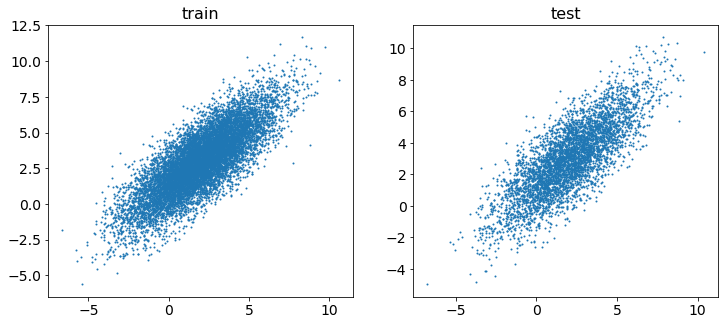

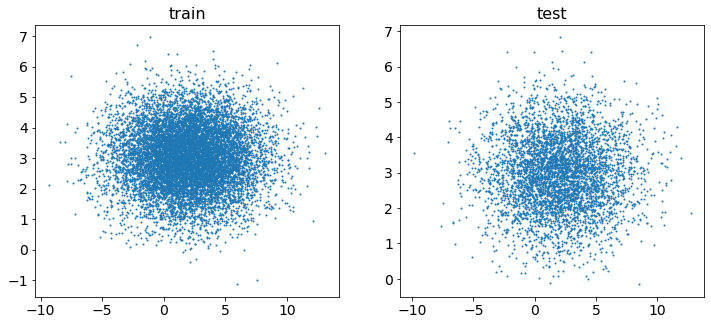

In [7]:
COUNT = 15000

train_data, test_data = generate_2d_data(COUNT, mode='multivariate')
visualize_2d_data(train_data, test_data)

train_data, test_data = generate_2d_data(COUNT, mode='univariate')
visualize_2d_data(train_data, test_data)

The difference of these two cases is the form of covariance matrix $\boldsymbol{\Sigma}$.

In multivariate case the matrix is non-diagonal, in univariate case it is strictly diagonal. As you will see, our VAE model will have absolutely different results for these datasets.

Now it is time to define our model. Our model will have the following structure:

* The latent dimensionality is equal to 2, the same as the data dimensionality ($\mathbf{z} \in \mathbb{R}^2$, $\mathbf{x} \in \mathbb{R}^2$).
* Prior distribution is standard Normal ($p(\mathbf{z}) = \mathcal{N}(0, I)$).
* Variational posterior distribution (or encoder) is $q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) = \mathcal{N}(\boldsymbol{\mu}_{\boldsymbol{\phi}}(\mathbf{x}), \boldsymbol{\Sigma}_{\boldsymbol{\phi}}(\mathbf{x}))$. Here $\boldsymbol{\phi}$ denotes all parameters of the encoder neural network. 
* Generative distribution (or decoder) is $p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta}) = \mathcal{N}(\boldsymbol{\mu}_{\boldsymbol{\theta}}(\mathbf{z}), \boldsymbol{\Sigma}_{\boldsymbol{\theta}}(\mathbf{z}))$. Here $\boldsymbol{\theta}$ denotes all parameters of the decoder neural network. Please note, that here we will use continuous distribution for our variables $\mathbf{x}$.
* We will consider only diagonal covariance matrices $\boldsymbol{\Sigma}_{\boldsymbol{\phi}}(\mathbf{x})$, $\boldsymbol{\Sigma}_{\boldsymbol{\theta}}(\mathbf{z})$.

Model objective is ELBO:
$$
    \mathcal{L}(\boldsymbol{\phi}, \boldsymbol{\theta}) = \mathbb{E}_{q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi})} \log p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta}) - KL (q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) || p(\mathbf{z})).
$$

To make the expectation independent of parameters $\boldsymbol{\phi}$, we will use reparametrization trick.

To calculate the loss, we should derive
- $\log p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta})$, note that generative distribution is $\mathcal{N}(\boldsymbol{\mu}_{\boldsymbol{\theta}}(\mathbf{z}), \boldsymbol{\Sigma}_{\boldsymbol{\theta}}(\mathbf{z}))$.
- KL between $\mathcal{N}(\boldsymbol{\mu}_{\boldsymbol{\phi}}(\mathbf{x}), \boldsymbol{\Sigma}_{\boldsymbol{\phi}}(\mathbf{x}))$ and $\mathcal{N}(0, I)$.

Let start with the helper functions.

In [8]:
def get_normal_KL(mean_1, log_std_1, mean_2=None, log_std_2=None):
    """
        This function should return the value of KL(p1 || p2),
        where p1 = Normal(mean_1, exp(log_std_1)), p2 = Normal(mean_2, exp(log_std_2) ** 2).
        If mean_2 and log_std_2 are None values, we will use standard normal distribution.
        Note that we consider the case of diagonal covariance matrix.
    """
    if mean_2 is None:
        mean_2 = torch.zeros_like(mean_1)
    if log_std_2 is None:
        log_std_2 = torch.zeros_like(log_std_1)
    # https://stats.stackexchange.com/questions/7440/kl-divergence-between-two-univariate-gaussians
    KL_part1 = log_std_2 - log_std_1 - 0.5
    KL_part2 = (torch.exp(log_std_1) ** 2 + (mean_1 - mean_2) ** 2) / (2 * torch.exp(log_std_2) ** 2)
    return KL_part1 + KL_part2

def test_KL():
    assert np.isclose(get_normal_KL(torch.tensor(2), torch.tensor(3), torch.tensor(0), torch.tensor(0)).numpy(), 200.2144, rtol=1e-3)
    assert np.isclose(get_normal_KL(torch.tensor(2), torch.tensor(3), torch.tensor(4), torch.tensor(5)).numpy(), 1.50925, rtol=1e-3)
    assert np.allclose(get_normal_KL(torch.tensor((10, 10)), torch.tensor((2, 4)), torch.tensor((3, 5))).numpy(), [49.2990, 1498.479], rtol=1e-3)


test_KL()

In [9]:
def get_normal_nll(x, mean, log_std):
    """
        This function should return the negative log likelihood log p(x),
        where p(x) = Normal(x | mean, exp(log_std) ** 2).
        Note that we consider the case of diagonal covariance matrix.
    """
    # https://stats.stackexchange.com/questions/521091/optimizing-gaussian-negative-log-likelihood
    ll_const = np.log(1 / ((2 * torch.pi) ** (0.5)))
    ll = ll_const - log_std - 0.5 * ((x - mean) / torch.exp(log_std)) ** 2
    return -ll


def test_NLL():
    assert np.isclose(get_normal_nll(torch.tensor(2), torch.tensor(2), torch.tensor(3)).numpy(), 3.9189, rtol=1e-3)
    assert np.isclose(get_normal_nll(torch.tensor(5), torch.tensor(-3), torch.tensor(6)).numpy(), 6.9191, rtol=1e-3)
    assert np.allclose(get_normal_nll(torch.tensor((10, 10)), torch.tensor((2, 4)), torch.tensor((3, 5))).numpy(), np.array([3.9982, 5.9197]), rtol=1e-3)

test_NLL()

We will use simple fully connected dense networks for encoder and decoder.

In [10]:
class FullyConnectedMLP(nn.Module):
    def __init__(self, input_shape, hiddens, output_shape):
        assert isinstance(hiddens, list)
        super().__init__()
        self.input_shape = (input_shape,)
        self.output_shape = (output_shape,)
        self.hiddens = hiddens

        model = []

        # ====
        # stack Dense layers with ReLU activation
        # note: you do not have to add relu after the last dense layer
        model.append(nn.Linear(input_shape, self.hiddens[0]))
        model.append(nn.ReLU(inplace=True))
        model.append(nn.Linear(self.hiddens[0], self.hiddens[1]))
        model.append(nn.ReLU(inplace=True))
        model.append(nn.Linear(self.hiddens[1], output_shape))
        # ====
        self.net = nn.Sequential(*model)

    def forward(self, x):
        # ====
        # apply network that was defined in __init__ and return the output
        output = self.net(x)
        return output
        # ====

Now it is time to implement the VAE model.

In [11]:
class VAE2d(nn.Module):
    def __init__(self, n_in, n_latent, enc_hidden_sizes, dec_hidden_sizes):
        assert isinstance(enc_hidden_sizes, list)
        assert isinstance(dec_hidden_sizes, list)
        super().__init__()
        self.n_latent = n_latent

        # ====
        # define encoder and decoder networks
        # the encoder takes n_in elements, has enc_hidden_sizes neurons in hidden layers 
        # and outputs 2 * n_latent (n_latent for means, and n_latent for std)
        self.encoder = FullyConnectedMLP(n_in, enc_hidden_sizes, 2 * n_latent)
        # the decoder takes n_latent elements, has dec_hidden_sizes neurons in hidden layers 
        # and outputs 2 * n_in (n_in for means, and n_in for std)
        self.decoder = FullyConnectedMLP(n_latent, dec_hidden_sizes, 2 * n_in)
        # ====

    def prior(self, n):
        # ====
        # return n samples from prior distribution (we use standard normal for prior)
        p = torch.distributions.Normal(torch.zeros(self.n_latent),
                                       torch.ones(self.n_latent))
        samples = p.sample((n,)).cuda() if USE_CUDA else p.sample((n,))
        return samples
        # ====

    def forward(self, x):
        # ====
        # now you have to return from the model 
        # - mu_z - means for variational distribution 
        # - mu_x - means for generative distribution
        # - log_std_z - logarithm of std for variational distribution
        # - log_std_x - logarithm of std for generative distribution
        # we use logarithm, since the std is always positive
        # to get std we will exponentiate it to get rid of this constraint
        # 1) mu_z, log_std_z are outputs from the encoder
        # 2) apply reparametrization trick to get z (input of decoder)
        # (do not forget to use self.prior())
        # 3) mu_x, log_std_x are outputs from the decoder
        #    Note: [mu, log_std = decoder(input).chunk(2, dim=1)]
        mu_z, log_std_z = self.encoder(x).chunk(2, dim=1)
        z = torch.exp(log_std_z) * self.prior(x.shape[0]) + mu_z  #
        mu_x, log_std_x = self.decoder(z).chunk(2, dim=1)
        # ====
        return mu_z, log_std_z, mu_x, log_std_x

    def loss(self, x):
        mu_z, log_std_z, mu_x, log_std_x = self(x)
        # ====
        # 1) apply model to get mu_z, log_std_z, mu_x, log_std_x
        # 2) compute reconstruction loss using get_normal_nll (it is the first term in ELBO)
        # 3) compute KL loss using get_normal_KL (it is the second term in ELBO)
        recon_loss = torch.sum(get_normal_nll(x, mu_x, log_std_x))
        kl_loss = torch.sum(get_normal_KL(mu_z, log_std_z))
        # ====

        return {
            'elbo_loss': recon_loss + kl_loss, 
            'recon_loss': recon_loss,
            'kl_loss': kl_loss
        }

    def sample(self, n, sample_from_decoder=True):
        with torch.no_grad():
            # ====
            # to sample from VAE model you have to sample from prior
            # and then apply decoder to prior samples.
            # parameter noise indicates whether to sample from decoder
            # or just use means of generative distribution as samples
            # 1) generate prior samples
            # 2) apply decoder
            # 3) sample from the decoder distribution if sample_from_decoder=True
            
            samples = self.prior(n)
            mu_z, log_std_z = self.decoder(samples).chunk(2, dim=1)
            
            if sample_from_decoder == True:
                z = torch.exp(log_std_z) * samples + mu_z
            else:
                z = mu_z
            # ====
        return z.cpu().numpy()

We will use the following function for training our models. Look carefully, do not change.

In [12]:
def solve_task(train_data, test_data, model, batch_size, epochs, lr, use_cuda=False, use_tqdm=False):
    train_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
    test_loader = data.DataLoader(test_data, batch_size=BATCH_SIZE)

    train_losses, test_losses = train_model(
        model, train_loader, test_loader, epochs=EPOCHS, lr=LR, use_cuda=use_cuda, use_tqdm=use_tqdm, loss_key='elbo_loss'
    )
    samples_noise = model.sample(3000, sample_from_decoder=True)
    samples_nonoise = model.sample(3000, sample_from_decoder=False)

    for key, value in test_losses.items():
        print('{}: {:.4f}'.format(key, value[-1]))

    plot_training_curves(train_losses, test_losses)
    visualize_2d_samples(samples_noise, title='Samples with Decoder Noise')
    visualize_2d_samples(samples_nonoise, title='Samples without Decoder Noise')

In [13]:
# ====
# choose these parameters (2 hidden layers could be enough for encoder and decoder)
ENC_HIDDEN_SIZES = [16, 16]
DEC_HIDDEN_SIZES = [8, 8]
BATCH_SIZE = 32 # any adequate value
EPOCHS = 8     # < 10
LR = 4e-3         # < 1e-2
# ====

COUNT = 10000

Firstly, we will train the VAE model for multivariate gaussian distribution.

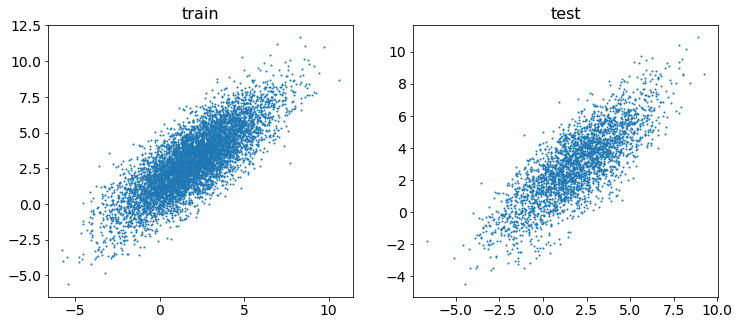

elbo_loss: 125.9307
recon_loss: 92.6078
kl_loss: 33.3230


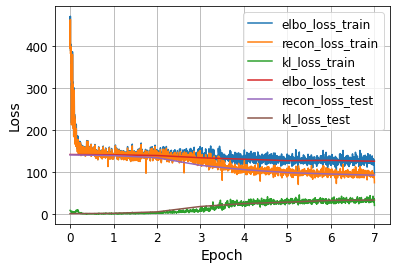

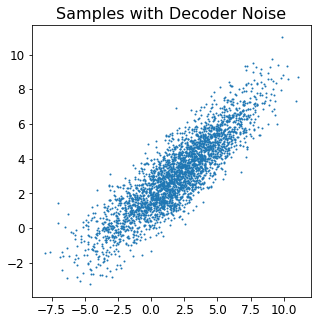

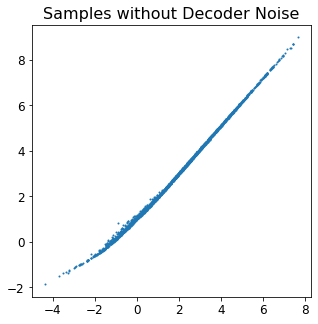

In [14]:
train_data, test_data = generate_2d_data(COUNT, mode='multivariate')
visualize_2d_data(train_data, test_data)

model = VAE2d(2, 2, ENC_HIDDEN_SIZES, DEC_HIDDEN_SIZES)
solve_task(train_data, test_data, model, BATCH_SIZE, EPOCHS, LR, use_cuda=USE_CUDA)

To analyze our models we will use the following function. Look carefully, do not change.

This function calculates the mean $\boldsymbol{\mu}_{\boldsymbol{\phi}}(\mathbf{x})$, and covariances $\boldsymbol{\Sigma}_{\boldsymbol{\phi}}(\mathbf{x})$ of the variational posterior distribution $q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi})$.

In [15]:
def get_latent_stats(model, test_data, use_cuda=True, batch_size=3000):
    batch = next(iter(data.DataLoader(test_data, batch_size=batch_size, shuffle=True)))
    if use_cuda:
        batch = batch.cuda()

    with torch.no_grad():
        mu_z, log_std_z = model(batch)[:2]
        
    mu_z = mu_z.cpu().numpy()
    std_z = log_std_z.exp().cpu().numpy()

    return mu_z, std_z

In [16]:
# just look at these numbers and read the comments after this task
mu_z, std_z = get_latent_stats(model, test_data)

print('mu_z = ', mu_z.mean(axis=0), '+-', mu_z.std(axis=0))
print('std_z = ', std_z.mean(axis=0), '+-', std_z.std(axis=0))

mu_z =  [-0.01192129 -0.00749061] +- [0.96699363 0.04296066]
std_z =  [0.365345 1.009634] +- [0.01332149 0.02052131]


Secondly, we will train the VAE model for univariate gaussian distribution.

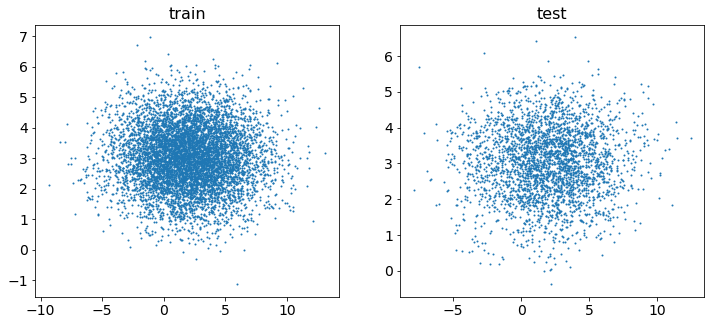

elbo_loss: 125.2759
recon_loss: 125.1711
kl_loss: 0.1047


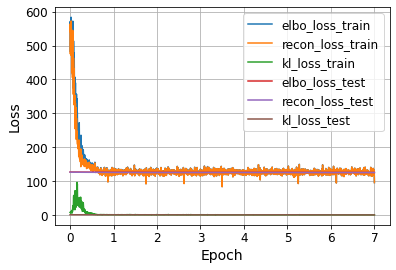

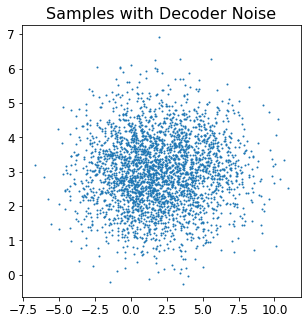

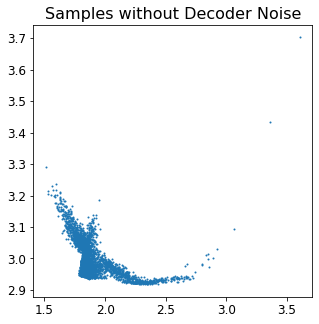

In [17]:
train_data, test_data = generate_2d_data(COUNT, mode='univariate')
visualize_2d_data(train_data, test_data)

model = VAE2d(2, 2, ENC_HIDDEN_SIZES, DEC_HIDDEN_SIZES)
if USE_CUDA:
    model = model.cuda()
solve_task(train_data, test_data, model, BATCH_SIZE, EPOCHS, LR, use_cuda=USE_CUDA)

In [18]:
# just look at these numbers and read comments after this task
mu_z, std_z = get_latent_stats(model, test_data)

print('mu_z = ', mu_z.mean(axis=0), '+-', mu_z.std(axis=0))
print('std_z = ', std_z.mean(axis=0), '+-', std_z.std(axis=0))

mu_z =  [0.01955984 0.00047385] +- [0.05530087 0.04313939]
std_z =  [0.9956453 1.0037521] +- [0.02215555 0.01007272]


After training the VAE model on these 2 datasets, have a look at "Samples without Decoder Noise" figures. These figures show the means $\boldsymbol{\mu}_{\boldsymbol{\theta}}(\mathbf{z})$ of the generative distribution $p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta})$. In the case of multivariate gaussian, the means are perfectly aligned with the data distribution. 
Otherwise, you have to see the strange figure in the univariate gaussian case . This happens due to so called **posterior collapse** (we will discuss it at the one of our lectures).

To be brief, the reason is the following. Our posterior distribution $p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta}) = \mathcal{N}(\boldsymbol{\mu}_{\boldsymbol{\theta}}(\mathbf{z}), \boldsymbol{\Sigma}_{\boldsymbol{\theta}}(\mathbf{z}))$ is a univariate (covariance matrix is diagonal). Thus, the model does not need latent variable since the data distribution is also univariate. In this case VAE ignores latent variable, cause the model fits the distribution without any information from latent space.

If the decoder ignores latent variable, the second term in ELBO (KL) could be low (variational posterior distribution, which is given by encoder model, is close to prior distribution for each datapoint). In the training curves you have to see that KL loss behaves differently in these two cases.

The mean and std of variational posterior distribution also proves this concept. For the second case you have to see that mean is almost zero and std is almost one.

It is a real problem for generative models and we will discuss later how to overcome it.

## Task 3: VAE on CIFAR10 data (4pt)

In this task you will implement VAE model for CIFAR10 dataset. 

Download the data from [here](https://drive.google.com/file/d/1FZcV8Mm91fiXm2jFnB0jvK5ROyHdJFvj/view?usp=sharing) (you could use the cell below).

In [19]:
!gdown 1FZcV8Mm91fiXm2jFnB0jvK5ROyHdJFvj

Downloading...
From: https://drive.google.com/uc?id=1FZcV8Mm91fiXm2jFnB0jvK5ROyHdJFvj
To: /content/cifar10.pkl
100% 185M/185M [00:04<00:00, 41.3MB/s]


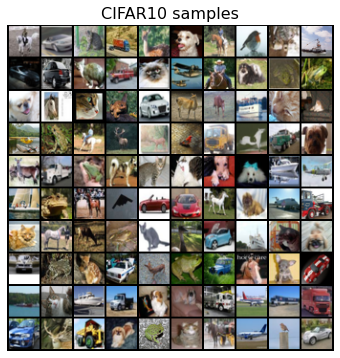

In [20]:
train_data, test_data = load_pickle('cifar10.pkl', flatten=False, binarize=False)
visualize_images(train_data, 'CIFAR10 samples')

Here the model specification will be almost the same (as in Task 2) with the following differences:
* Now our encoder and decoder will be convolutional.
* We do not fit the covariance matrix $\boldsymbol{\Sigma}_{\boldsymbol{\theta}}(\mathbf{z})$ in the generative distribution $p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta})$. We assume that it is identical ($\boldsymbol{\Sigma}_{\boldsymbol{\theta}}(\mathbf{z}) = \mathbf{I}$). We will use the $\boldsymbol{\mu}_{\boldsymbol{\theta}}(\mathbf{z})$ means of the generative distribution $p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta})$ as model samples.
* Model objective is slightly modified ELBO:
$$
    \mathcal{L}(\boldsymbol{\phi}, \boldsymbol{\theta}) = \mathbb{E}_{q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi})} \log p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta}) - \beta * KL (q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) || p(\mathbf{z})).
$$
Here we introduce the parameter $\beta$. It reweights KL term in the total loss. We will discuss the choice of this parameter later in the course. In this exercise you have to play with it, starting with the value $\beta = 1$ (standard ELBO).

Let define our convolutional encoder and decoder.

In [21]:
class ConvEncoder(nn.Module):
    def __init__(self, input_shape, n_latent):
        super().__init__()
        self.input_shape = input_shape
        self.n_latent = n_latent
        # ====
        # we suggest to use the following architecture
        # conv2d(32) -> relu -> conv(64) -> relu -> conv(128) -> relu -> 
        # conv(256) -> fc(2 * n_latent)
        # but we encourage you to create your own architecture
        model = []
        ch, h, w = self.input_shape
        model.append(nn.Conv2d(ch, 
                               32, 
                                kernel_size=3, 
                                padding=1,
                                # padding_mode='reflect'
                                ))
        model.append(nn.ReLU(inplace=True))
        
        model.append(nn.Conv2d(32,
                               64, 
                                kernel_size=3, 
                                padding=1,
                                # padding_mode='reflect'
                                ))
        model.append(nn.ReLU(inplace=True))

        model.append(nn.Conv2d(64, 
                               128, 
                                kernel_size=3, 
                                padding=1,
                                # padding_mode='reflect'
                                ))
        model.append(nn.ReLU(inplace=True))
        
        model.append(nn.Conv2d(128, 
                               256, 
                                kernel_size=3, 
                                padding=1,
                                # padding_mode='reflect'
                                ))
        
        self.convs = nn.Sequential(*model)
        self.fc = nn.Linear(256 * w * h, 2 * n_latent)
        
        # ====

    def forward(self, x):
        # ====
        # 1) apply convs
        # 2) reshape the output to 2d matrix for last fc layer
        # 3) apply fc layer
        out = self.convs(x)
        out = torch.flatten(out, start_dim=1)
        mu, log_std = self.fc(out).chunk(2, dim=1)
        # ====
        return mu, log_std
        

class ConvDecoder(nn.Module):
    def __init__(self, n_latent, output_shape):
        super().__init__()
        self.n_latent = n_latent
        self.output_shape = output_shape

        self.base_size = (128, output_shape[1] // 8, output_shape[2] // 8)
        # ====
        # we suggest to use the following architecture
        # fc -> conv2dtranspose(128) -> relu -> conv2dtranspose(64) -> relu 
        # -> conv2dtranspose(32) -> relu -> conv2dtranspose(3)
        # but we encourage you to create your own architecture
        s = int(128 * output_shape[1] // 8 * output_shape[2] // 8)
        self.fc = nn.Linear(n_latent, s)
        
        model = []
        
        model.append(nn.ConvTranspose2d(128, 
                                        128,
                                        kernel_size=3, 
                                        output_padding=1, 
                                        padding=1, 
                                        stride=2
                                        )) 
        model.append(nn.ReLU(inplace=True)) 

        model.append(nn.ConvTranspose2d(128,
                                        64,
                                        kernel_size=3, 
                                        output_padding=1, 
                                        padding=1, 
                                        stride=2
                                        )) 
        model.append(nn.ReLU(inplace=True)) 

        model.append(nn.ConvTranspose2d(64,
                                        32,
                                        kernel_size=3, 
                                        output_padding=1, 
                                        padding=1, 
                                        stride=2
                                        )) 
        model.append(nn.ReLU(inplace=True))  

        model.append(nn.ConvTranspose2d(32,
                                        16,
                                        kernel_size=3, 
                                        output_padding=1, 
                                        padding=1, 
                                        stride=2
                                        ))  
        model.append(nn.ReLU(inplace=True))  

        model.append(nn.ConvTranspose2d(16, 
                                        3,
                                        kernel_size=3, 
                                        output_padding=1, 
                                        padding=1, 
                                        stride=2
                                        )) 
        model.append(nn.ReLU(inplace=True))

        model.append(nn.Conv2d(3, 
                               3, 
                               kernel_size=3, 
                               padding=1,
                               padding_mode='reflect',
                               stride=2))
        model.append(nn.ReLU(inplace=True))

        model.append(nn.Conv2d(3, 
                               3, 
                               kernel_size=3, 
                               padding=1,
                               padding_mode='reflect',
                               stride=2))

        self.convs = nn.Sequential(*model)
        # ====


    def forward(self, z):
        # ====
        # 1) apply fc layer
        # 2) reshape the output to 4d tensor 
        # 3) apply conv layers
        out = self.fc(z)
        out = out.view(out.shape[0], *self.base_size)
        out = self.convs(out)
        # ====
        return out

Now it is time to implement VAE model for image dataset.

In [22]:
class ConvVAE(nn.Module):
    def __init__(self, input_shape, n_latent, beta=1):
        super().__init__()
        assert len(input_shape) == 3

        self.input_shape = input_shape
        self.n_latent = n_latent
        self.beta = beta
        # ====
        # define encoder with input size input_shape and output dim n_latent
        self.encoder = ConvEncoder(input_shape, n_latent)
        # define decoder with input dim n_latent and output size input_shape
        self.decoder = ConvDecoder(n_latent, input_shape)
        # ====
    
    def prior(self, n, use_cuda=True):
        # ====
        # return n samples from prior distribution (we use standart normal for prior)
        p = torch.distributions.Normal(torch.zeros(self.n_latent),
                                       torch.ones(self.n_latent))
        samples = p.sample((n,)).cuda() if use_cuda else p.sample((n,))
        # ====
        return samples

    def forward(self, x):
        # ====
        # 1) apply encoder to get mu_z, log_std_z
        # 2) apply reparametrization trick (use self.prior)
        # 3) apply decoder to get mu_x (which corresponds to reconstructed x)
        mu_z, log_std_z = self.encoder(x)
        prior = self.prior(x.shape[0])
        z = torch.exp(log_std_z) * prior + mu_z
        x_recon = self.decoder(z)
        # ====
        return mu_z, log_std_z, x_recon
        
    
    def loss(self, x):
        # ====
        # 1) make forward step to get mu_z, log_std_z, x_recon
        # 2) calculate recon_loss (use get_normal_nll)
        # 3) calcucalte kl_loss (use get_normal_KL)
        mu_z, log_std_z, x_recon = self(x)
        recon_loss = torch.sum(get_normal_nll(x, x_recon, torch.zeros_like(x_recon)))
        kl_loss = torch.sum(get_normal_KL(mu_z, log_std_z))
        # ==== 
        return {
            'elbo_loss': recon_loss + self.beta * kl_loss, 
            'recon_loss': recon_loss,
            'kl_loss': kl_loss
        }

    
    def sample(self, n):
        with torch.no_grad():
            # ====
            # 1) generate prior samples
            # 2) apply decoder
            samples = self.prior(n)
            samples = self.decoder(samples)
            # ====
            samples = torch.clamp(samples, -1, 1)
        return samples.cpu().numpy() * 0.5 + 0.5

  0%|          | 0/4 [00:00<?, ?it/s]

elbo_loss: 46682.7875
recon_loss: 46191.0617
kl_loss: 1229.3143


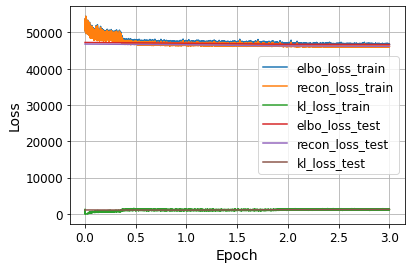

In [23]:
# ====
# choose these parameters

BATCH_SIZE =  16  # any adequate value
EPOCHS =      4    # < 16
LR =          1e-4 # < 1e-3
N_LATENS =    256  # 128 < _ < 1024
BETA =        0.4  # 0.1 < _ < 10
# ====

# we center the data, because it helps the model to fit
centered_train_data = train_data * 2 - 1
centered_test_data  = test_data  * 2 - 1

train_loader = data.DataLoader(centered_train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader  = data.DataLoader(centered_test_data, batch_size=BATCH_SIZE)


model = ConvVAE((3, 32, 32), N_LATENS, BETA)

train_losses, test_losses = train_model(
    model, 
    train_loader, 
    test_loader, 
    epochs=EPOCHS, 
    lr=LR, 
    loss_key='elbo_loss', 
    use_tqdm=True, 
    use_cuda=USE_CUDA, 
)
for key, value in test_losses.items():
    print('{}: {:.4f}'.format(key, value[-1]))
plot_training_curves(train_losses, test_losses)

Now we could visualize the model outputs.

1. We could sample new images from our model (sample latent variable from the prior and apply the decoder).
2. We could visualize image reconstructions (apply the encoder and the decoder to the fixed image).
3. Visualize interpolations (apply the encoder to two images $\mathbf{x}_1$ and $\mathbf{x}_2$ to obtain the latent variables $\mathbf{z}_1$ and $\mathbf{z}_2$, apply the decoder to the latent variables $\mathbf{z}$ lying on the segment between $\mathbf{z}_1$ and $\mathbf{z}_2$).

**Note:** it is ok, that your samples are blurry. We do not use difficult architectures and do not tune hyperparameters carefully.

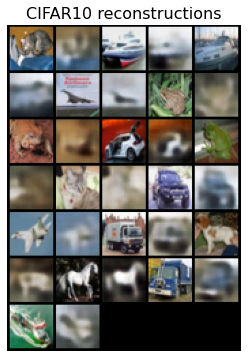

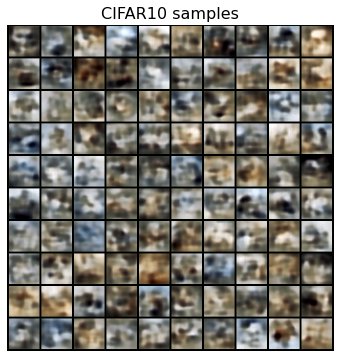

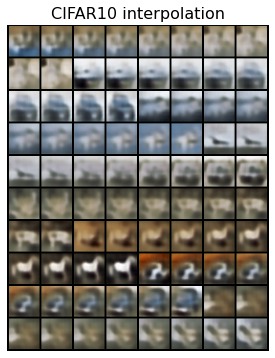

In [24]:
samples = model.sample(100)

x = next(iter(test_loader))[:50]

if USE_CUDA:
    x = x.cuda()

with torch.no_grad():
    z, _ = model.encoder(x)
    x_recon = torch.clamp(model.decoder(z), -1, 1)
reconstructions = torch.stack((x, x_recon), dim=1).view(-1, 3, 32, 32) * 0.5 + 0.5
reconstructions = reconstructions.cpu().numpy()

x = next(iter(test_loader))[:20].cuda()
with torch.no_grad():
    z, _ = model.encoder(x)
    z1, z2 = z.chunk(2, dim=0)
    interps = [model.decoder(z1 * (1 - alpha) + z2 * alpha) for alpha in np.linspace(0, 1, 10)]
    interps = torch.stack(interps, dim=1).view(-1, 3, 32, 32)
    interps = torch.clamp(interps, -1, 1) * 0.5 + 0.5
interps = interps.cpu().numpy()

show_samples(reconstructions, 'CIFAR10 reconstructions')
show_samples(samples, 'CIFAR10 samples')
show_samples(interps, 'CIFAR10 interpolation')